# Tutorial 3b. Multilayer Perceptrons with Auto-differentiation!


- In this tutorial you will train (again) a multilayer perceptron

- But differently from what you did in `tutorial3a`, since this time, you will let the `PyTorch` library do most of the complicated work for you

- The goal of this notebook is to make you get familiar with `PyTorch` and the its main concepts, that we will use repeatedly along the course.

- We will be training a multilayer perceptron on the `CIFAR-10` dataset, a popular dataset of images that is used in Computer-Vision (CV) research

- You will need to use a lot the documentation of `PyTorch` and look at examples for this notebook.

## name:
Merwan EL ASRI (pas de binôme) 


In [1]:
import torch, torchvision
import numpy as np
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt 

## Load the dataset

- `PyTorch` provides popular computer vision datasets that can be easily downloaded
- The following code will download the `CIFAR-10` dataset for us  
- Since it is computationally expensive to load the entire dataset into memory, we will use `PyTorch`'s dataloaders  before feeding batches of images to the neural network

**QUESTION.** Fill in the next cell

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root = "./data", train = True, download = True, transform = transform)
testset = datasets.CIFAR10(root = "./data", train = False, download = True, transform = transform)

batch_size = 64
# You should use as many cores you have on your laptop
num_workers = 2

# Fill in the options for both data loaders. Warning: the training dataloader should shuffle the data
trainloader = torch.utils.data.DataLoader(dataset=trainset, shuffle=True, batch_size=batch_size, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(dataset=testset, shuffle=False, batch_size=batch_size, num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Visualize the Images of CIFAR-10

* Once everything is properly loaded you should be able to visualize some of the samples of the CIFAR-10

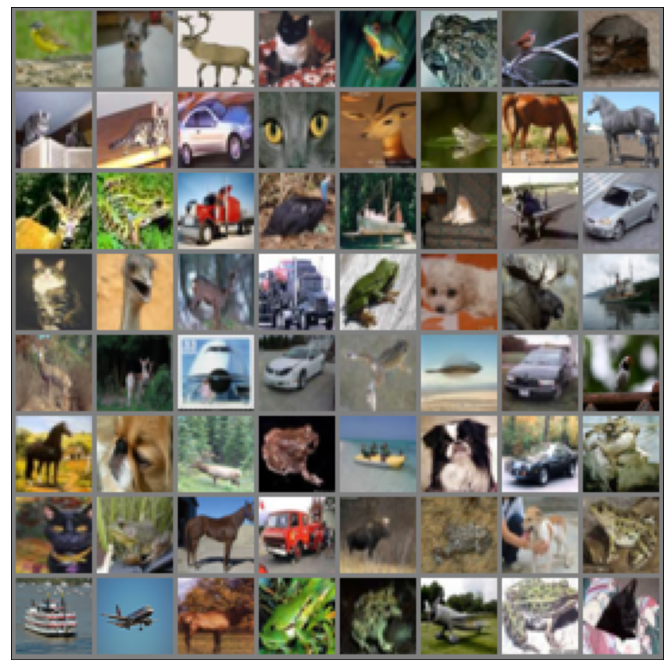


 bird   dog  deer   cat  frog  frog  bird   cat   cat   cat   car   cat  deer  frog horse horse  deer  frog truck  bird  ship   cat plane   car   cat  bird  deer truck  frog   dog  deer  ship  deer  deer plane   car  frog plane   car  bird horse   dog  deer  frog  ship   dog   car  frog   cat  frog horse truck  deer  frog   dog  frog  ship plane  deer  frog  frog plane  frog   cat


In [4]:
def show_images(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
show_images(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Creating a MLP model and train it

- We are now ready to define all the necessary hyperparameters that are required to construct a proper MLP
- Similarly to what we did in `tutorial03a` we need to explore the data carefully in order to know how to set the following parameters

### Hyperparameters

**QUESTION.** Fill the hyperparameters

In [5]:
images.size()

torch.Size([64, 3, 32, 32])

In [28]:
input_dim = 3*32*32  # 3 channels, images de taille 32 x 32
# hidden_dim : défini dans la classe Net
output_dim = 10  # 10 labels differents
learning_rate = 0.002
num_epochs = 20

### Computation Graph

- You are free to define any kind of architecture that you think is reasonable for the problem of classifying CIFAR-10 images
- By default, you can use a multi-layer perceptron
- The constructor of the neural network will represent the different components of the computation-graph, note that it is very similar to the way we have programmed our own neural network in `tutorial03a`.
- You will also have to define the forward pass yourself.

In [70]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Net, self).__init__()

        hidden1 = 1024
        hidden2 = 512
        hidden3 = 256
        hidden4 = 128
        hidden5 = 64

        self.LeakyReLU = nn.LeakyReLU() 

        # 1ere couche cachée
        self.cc1 = nn.Linear(input_dim, hidden1)
        # 2e couche cachée
        self.cc2 = nn.Linear(hidden1, hidden2)
        # 3e couche cachée
        self.cc3 = nn.Linear(hidden2, hidden3)
        # 4e couche cachée
        self.cc4 = nn.Linear(hidden3, hidden4)
        # 5e couche cachée
        self.cc5 = nn.Linear(hidden4, hidden5)
        # 6e couche cachée
        self.output = nn.Linear(hidden5, output_dim)

    def forward(self, x):
        # 1ere couche cachée
        pred = self.cc1(x)
        pred = self.LeakyReLU(pred)
        # 2e couche cachée
        pred = self.cc2(pred)
        pred = self.LeakyReLU(pred)
        # 3e couche cachée
        pred = self.cc3(pred)
        pred = self.LeakyReLU(pred)
        # 4e couche cachée
        pred = self.cc4(pred)
        pred = self.LeakyReLU(pred)
        # 5e couche cachée
        pred = self.cc5(pred)
        pred = self.LeakyReLU(pred)
        # 6e couche cachée
        pred = self.output(pred)

        return pred


### Create the Network

- You are now ready to create your neural network object
- You will also have to define an appropriate loss function to minimize and an optimization algorithm
- By default, you can use the cross-entropy loss and the RMS prop optimizer

In [71]:
model = Net(input_dim, output_dim).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [72]:
print(model)

Net(
  (LeakyReLU): LeakyReLU(negative_slope=0.01)
  (cc1): Linear(in_features=3072, out_features=1024, bias=True)
  (cc2): Linear(in_features=1024, out_features=512, bias=True)
  (cc3): Linear(in_features=512, out_features=256, bias=True)
  (cc4): Linear(in_features=256, out_features=128, bias=True)
  (cc5): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


### Train the Network

- Once you have your neural network you just need to train it. 
- You will have to compute the output of the forward pass, compare it to your desired output and update the parameters of the network by backpropagation. 
- Fortunately this time, this only requires less than 5 lines of code in `PyTorch`

In [73]:
def predFor1Epoch(dataloader, learn=True):
    sum_loss = 0
    nbcorrect = 0
    total = 0
    for imagesTensors, labelsIndexes in dataloader:
        imagesTensors =  imagesTensors.reshape(-1, input_dim).to(device)  
        labelsIndexes = labelsIndexes.to(device)
        
        predLabels = model(imagesTensors)
        
        loss = criterion(predLabels, labelsIndexes)
        sum_loss += loss.item()
        _, predicted = torch.max(predLabels.data, 1)  # pour chaque image, la classe ayant la plus grande probabilité est récupèrée 
        nbcorrect += (predicted == labelsIndexes).sum().item()  # compte du nombre de label correctment prédit
        total += labels.size(0)

        # learning step
        if learn:
            model.zero_grad()
            loss.backward()
            optimizer.step()

    accurracy = nbcorrect/total
    loss = sum_loss/len(trainloader)
    return loss, accurracy

In [74]:
def train(num_epochs):
    model.train()  # training mode
    trainingloss_history = []
    accurracy_history = []
    for i in range(num_epochs):
        loss, accurracy = predFor1Epoch(trainloader)
        accurracy_history.append(accurracy)
        trainingloss_history.append(loss) 
        print(f"epoch {i+1}/{num_epochs} trainingLoss = {loss} trainingAccuracy = {accurracy}")

    return trainingloss_history, accurracy_history


In [75]:
trainingloss_history, accurracy_history = train(num_epochs)

epoch 1/20 trainingLoss = 1.9294742481482914 trainingAccuracy = 0.3502038043478261
epoch 2/20 trainingLoss = 1.5658046735826965 trainingAccuracy = 0.44743046675191817
epoch 3/20 trainingLoss = 1.4561353842620655 trainingAccuracy = 0.48799152813299235
epoch 4/20 trainingLoss = 1.3731625173097985 trainingAccuracy = 0.517303388746803
epoch 5/20 trainingLoss = 1.3117332520997127 trainingAccuracy = 0.543278452685422
epoch 6/20 trainingLoss = 1.2414769864905522 trainingAccuracy = 0.5669357416879796
epoch 7/20 trainingLoss = 1.1880332457135097 trainingAccuracy = 0.587176310741688
epoch 8/20 trainingLoss = 1.1261424972578082 trainingAccuracy = 0.6049592391304348
epoch 9/20 trainingLoss = 1.0924479302847783 trainingAccuracy = 0.6204044117647058
epoch 10/20 trainingLoss = 1.0389325091296144 trainingAccuracy = 0.6384870524296675
epoch 11/20 trainingLoss = 1.000105148919708 trainingAccuracy = 0.6554907289002557
epoch 12/20 trainingLoss = 0.9438672569554175 trainingAccuracy = 0.675531489769821
epoc

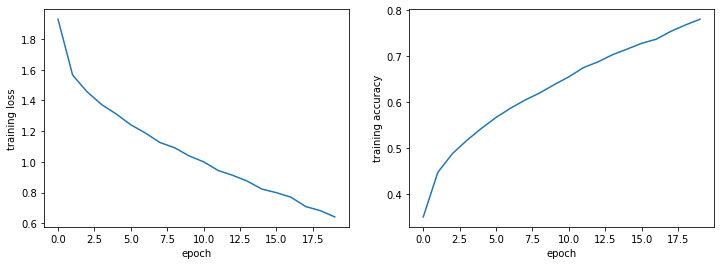

In [76]:
abs = np.array(range(0, num_epochs))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
_= plt.plot(abs, trainingloss_history)

_= plt.xlabel(xlabel="epoch")
_= plt.ylabel(ylabel="training loss")

plt.subplot(1, 2, 2)
_= plt.plot(abs, accurracy_history)

_= plt.xlabel(xlabel="epoch")
_= plt.ylabel(ylabel="training accuracy")

- Of course, repeated calls to `train` will continue training from where it were
- Training a neural network is a highly iterative process.

## Evaluate the final performance of the Network

- Once you think your network is properly trained, you will test its performance on the testing-set of the CIFAR-10 dataset
- Compute the final accuracy of your model
- You should be able to reach a 50% accuracy with a simple multi-layer perceptron

In [77]:

def test():
    model.eval()  # test mode
    with torch.no_grad():
        _, accurracy = predFor1Epoch(testloader, learn=False)
    return accurracy

In [78]:
print( f"test accuracy {test()}")

test accuracy 0.5146297770700637


**Final remark.** Of course, this is far from being the state-of-the-art. Indeed, convolutional neural nets are the backbones for computer vision problems (we will do it in following labs), while we only used here a feed-forward network.

## Redo it using `pytorch-lightning`

There is some boilerplates in pure `PyTorch` code. The `pytorch-lighting` library is a new library allowing to simplify a lot the use of `PyTorch` together with very nice options for faster training and development.

**QUESTION**. Recode your neural network and its training using `pytorch-lightning`.

In [79]:
!pip install pytorch-lightning-bolts

     |████████████████████████████████| 256kB 18.2MB/s 
     |████████████████████████████████| 819kB 39.8MB/s 
     |████████████████████████████████| 276kB 42.6MB/s 
     |████████████████████████████████| 112kB 55.8MB/s 
     |████████████████████████████████| 829kB 52.9MB/s 
     |████████████████████████████████| 1.3MB 53.3MB/s 
     |████████████████████████████████| 143kB 54.3MB/s 
     |████████████████████████████████| 296kB 56.6MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=91c05c5b4f0c8d694b06a2bad72a802e9a9444aeec126dc55338c928eed14a69
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=f3e18446b7f3c8791027537eb52c72769d27ef918f3c3e9a2365dbdeaaa6e0b3
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built PyYAM

In [81]:
import pytorch_lightning as pl
from torch.nn import functional as F
from pytorch_lightning.metrics.functional import accuracy
class LitModel(pl.LightningModule):
    def __init__(self, input_dim, output_dim):
        super(LitModel, self).__init__()

        hidden1 = 1024
        hidden2 = 512
        hidden3 = 256
        hidden4 = 128
        hidden5 = 64

        self.LeakyReLU = nn.LeakyReLU() 

        # 1ere couche cachée
        self.cc1 = nn.Linear(input_dim, hidden1)
        # 2e couche cachée
        self.cc2 = nn.Linear(hidden1, hidden2)
        # 3e couche cachée
        self.cc3 = nn.Linear(hidden2, hidden3)
        # 4e couche cachée
        self.cc4 = nn.Linear(hidden3, hidden4)
        # 5e couche cachée
        self.cc5 = nn.Linear(hidden4, hidden5)
        # 6e couche cachée
        self.output = nn.Linear(hidden5, output_dim)

    def forward(self, x):
        # 1ere couche cachée
        pred = self.cc1(x)
        pred = self.LeakyReLU(pred)
        # 2e couche cachée
        pred = self.cc2(pred)
        pred = self.LeakyReLU(pred)
        # 3e couche cachée
        pred = self.cc3(pred)
        pred = self.LeakyReLU(pred)
        # 4e couche cachée
        pred = self.cc4(pred)
        pred = self.LeakyReLU(pred)
        # 5e couche cachée
        pred = self.cc5(pred)
        pred = self.LeakyReLU(pred)
        # 6e couche cachée
        pred = self.output(pred)

        return pred

    def training_step(self, batch, batch_idx):
        x, y = batch
        x = x.reshape(-1, input_dim)
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)  # avec nn.CrossEntropyLoss, le trainer renvoi une erreur, je ne sais pas pourquoi
        acc = accuracy(torch.argmax(y_hat, dim=1), y)

        # logs will be printed at the progressbar, for each step (by default) and for each epoch
        self.log('training_loss', loss, prog_bar=True, on_epoch=True)
        self.log('training_accuracy', acc, prog_bar=True, on_epoch=True)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        x = x.reshape(-1, input_dim)
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)  # avec nn.CrossEntropyLoss, le trainer renvoi une erreur, je ne sais pas pourquoi
        acc = accuracy(torch.argmax(y_hat, dim=1), y)

        self.log('test_loss', loss )
        self.log('test_accuracy', acc)
        return loss

    def configure_optimizers(self):
        return torch.optim.RMSprop(self.parameters(), lr=learning_rate)


In [82]:

litModel = LitModel(input_dim, output_dim)
litModel

LitModel(
  (LeakyReLU): LeakyReLU(negative_slope=0.01)
  (cc1): Linear(in_features=3072, out_features=1024, bias=True)
  (cc2): Linear(in_features=1024, out_features=512, bias=True)
  (cc3): Linear(in_features=512, out_features=256, bias=True)
  (cc4): Linear(in_features=256, out_features=128, bias=True)
  (cc5): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [83]:
trainer = pl.Trainer(max_epochs=20, gpus=-1, auto_select_gpus=True)  # will use all available GPUs

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [84]:
trainer.fit(litModel, trainloader)


  | Name      | Type      | Params
----------------------------------------
0 | LeakyReLU | LeakyReLU | 0     
1 | cc1       | Linear    | 3.1 M 
2 | cc2       | Linear    | 524 K 
3 | cc3       | Linear    | 131 K 
4 | cc4       | Linear    | 32.9 K
5 | cc5       | Linear    | 8.3 K 
6 | output    | Linear    | 650   
----------------------------------------
3.8 M     Trainable params
0         Non-trainable params
3.8 M     Total params
15.379    Total estimated model params size (MB)


1

In [85]:
trainer.test(test_dataloaders=testloader)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5184999704360962, 'test_loss': 2.0195014476776123}
--------------------------------------------------------------------------------


[{'test_accuracy': 0.5184999704360962, 'test_loss': 2.0195014476776123}]